<a href="https://colab.research.google.com/github/AkshayK25/GoOgle-ColAbOratories/blob/master/Stock_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WILLIES TOWERS WATSON PLC - STOCK PREDICTION MODEL**

> **Willis Towers Watson** is a British global multinational risk management, insurance brokerage and advisory company. The firm has roots dating to 1828 and is the third largest insurance broker in the world.



**Stock price:** WLTW (NASDAQ) US$189.36 +2.59 (+1.39%)

15 Jun, 4:00 pm GMT-4 - Disclaimer

**Headquarters:** London, United Kingdom

**CEO: John Haley (4 Jan 2016– Present)**

Number of employees: 45,000

Founded: 5 January 2016

**Subsidiaries: Towers Watson, Gras Savoye, MG LLC**

Predecessors: Willis Group, Towers Watson



In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt


In [501]:
df = pd.read_csv('/content/prices-split-adjusted.csv',index_col="date",parse_dates=True)
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [502]:
df.isna().any()

symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [504]:
#get the number of trading days
df=df.loc[df['symbol'] == 'WLTW']
df.shape

(251, 6)

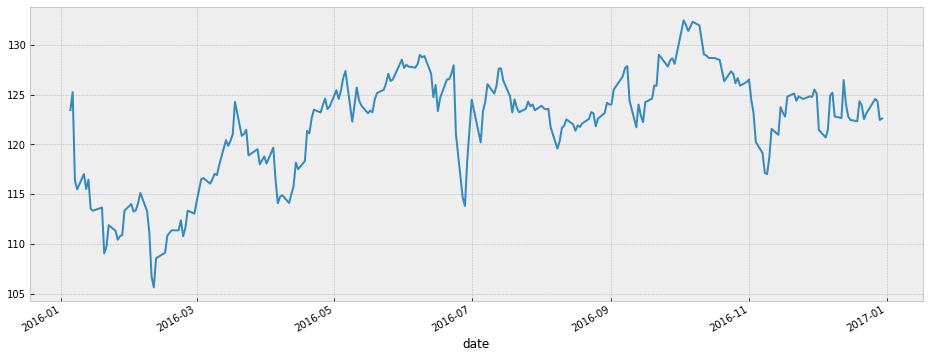

In [505]:
df['open'].plot(figsize=(16,6))

In [0]:
df["close"] = df["close"].astype(str).replace(',', '').astype(float)

In [0]:
df["volume"] = df["volume"].astype(str).replace(',', '').astype(float)

In [508]:
df.rolling(7).mean().head(20)

,open,close,low,high,volume
date,,,,,
2016-01-05,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN
2016-01-11,NaN,NaN,NaN,NaN,NaN
2016-01-12,NaN,NaN,NaN,NaN,NaN
2016-01-13,118.501429,117.251429,115.979999,119.918572,1.786000e+06
2016-01-14,117.084286,115.614286,114.228571,118.315714,1.589100e+06
2016-01-15,115.382858,114.550000,113.082856,116.792857,1.404429e+06


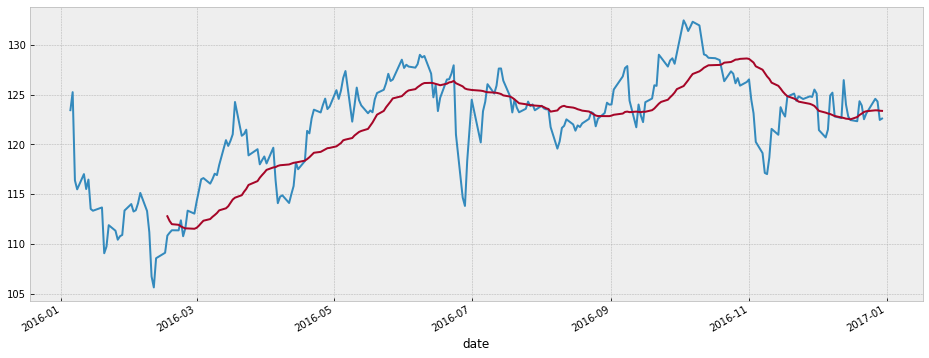

In [509]:
df['open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['close'].plot()

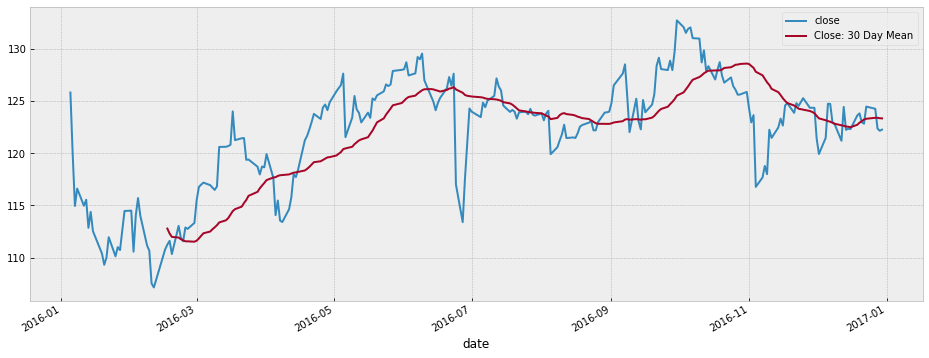

In [510]:
df['Close: 30 Day Mean'] = df['close'].rolling(window=30).mean()
df[['close','Close: 30 Day Mean']].plot(figsize=(16,6))

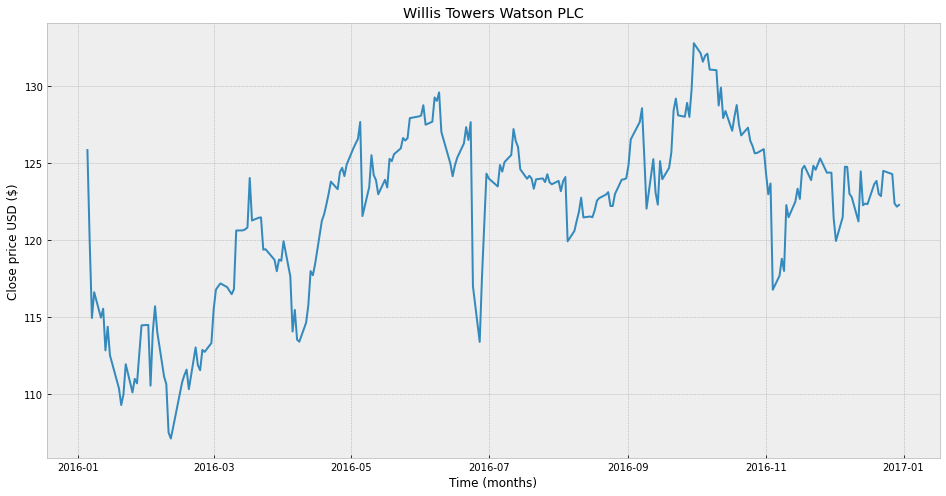

In [511]:
#visualize the close price data

plt.figure(figsize=(16,8))
plt.title('Willis Towers Watson PLC')
plt.xlabel('Time (months)')
plt.ylabel('Close price USD ($)')
plt.plot(df['close'])
plt.show()

In [512]:
#get the close price
df = df[['close']]
df.head()

,close
date,
2016-01-05,125.839996
2016-01-06,119.980003
2016-01-07,114.949997
2016-01-08,116.620003
2016-01-11,114.970001


In [513]:
#create a variable to predict 'x' days out into the future
future_days = 30
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['close']].shift(-future_days)
df.tail()

,close,Prediction
date,,
2016-12-23,124.489998,NaN
2016-12-27,124.279999,NaN
2016-12-28,122.379997,NaN
2016-12-29,122.169998,NaN
2016-12-30,122.279999,NaN


In [514]:
#create the Feature dataset(X) and convert it into numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[125.839996]
 [119.980003]
 [114.949997]
 [116.620003]
 [114.970001]
 [115.550003]
 [112.849998]
 [114.379997]
 [112.529999]
 [110.379997]
 [109.300003]
 [110.      ]
 [111.949997]
 [110.120003]
 [111.      ]
 [110.709999]
 [112.580002]
 [114.470001]
 [114.5     ]
 [110.559998]
 [114.050003]
 [115.709999]
 [114.019997]
 [111.160004]
 [110.650002]
 [107.519997]
 [107.129997]
 [107.839996]
 [110.769997]
 [111.239998]
 [111.599998]
 [110.330002]
 [113.040001]
 [111.889999]
 [111.559998]
 [112.879997]
 [112.75    ]
 [113.32    ]
 [115.510002]
 [116.779999]
 [117.      ]
 [117.190002]
 [116.949997]
 [116.709999]
 [116.489998]
 [116.82    ]
 [120.620003]
 [120.629997]
 [120.699997]
 [120.82    ]
 [124.029999]
 [121.269997]
 [121.449997]
 [121.470001]
 [119.379997]
 [119.410004]
 [118.720001]
 [117.980003]
 [118.739998]
 [118.660004]
 [119.93    ]
 [117.650002]
 [114.07    ]
 [115.470001]
 [113.540001]
 [113.410004]
 [114.639999]
 [115.790001]
 [117.989998]
 [117.720001]
 [118.449997]
 [121.

In [515]:
#Create Target dataset(Y) and convert it int0 a numpy array
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[111.599998 110.330002 113.040001 111.889999 111.559998 112.879997
 112.75     113.32     115.510002 116.779999 117.       117.190002
 116.949997 116.709999 116.489998 116.82     120.620003 120.629997
 120.699997 120.82     124.029999 121.269997 121.449997 121.470001
 119.379997 119.410004 118.720001 117.980003 118.739998 118.660004
 119.93     117.650002 114.07     115.470001 113.540001 113.410004
 114.639999 115.790001 117.989998 117.720001 118.449997 121.260002
 121.68     122.309998 123.010002 123.790001 123.300003 124.400002
 124.690002 124.150002 124.900002 125.959999 126.269997 126.559998
 127.660004 121.559998 123.440002 125.510002 124.209999 123.889999
 122.970001 123.910004 123.410004 125.269997 125.120003 125.57
 125.949997 126.620003 126.459999 126.610001 127.910004 128.020004
 128.070007 128.75     127.480003 127.68     129.25     129.029999
 129.580002 127.010002 125.470001 124.959999 124.139999 124.839996
 125.330002 126.269997 127.330002 126.489998 127.650002 117.010002

In [0]:
#spliting the data into 75% training and 25% testing

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [0]:
#Create the models
#Creae the Decision Tree Regressor Model
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [518]:
#Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future  = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[132.089996],
       [131.059998],
       [131.020004],
       [128.729996],
       [129.889999],
       [127.910004],
       [128.369995],
       [127.089996],
       [128.009995],
       [128.759995],
       [127.480003],
       [126.790001],
       [127.290001],
       [126.449997],
       [126.110001],
       [125.629997],
       [125.650002],
       [125.900002],
       [124.330002],
       [122.970001],
       [123.669998],
       [116.779999],
       [117.690002],
       [118.790001],
       [118.      ],
       [122.269997],
       [121.480003],
       [122.489998],
       [123.330002],
       [122.669998]])

In [519]:
#show the model Decision Tree Prediction
Tree_prediction = tree.predict(x_future)
print(Tree_prediction)
print()

#Show thr linear Regresssion Model
LR_prediction = lr.predict(x_future)
print(LR_prediction)

[124.599998  124.82      124.82      121.419998  124.559998  127.199997
 124.370003  124.379997  124.370003  121.419998  121.9600025 121.480003
 124.760002  124.75      123.        122.790001  121.209999  124.459999
 122.260002  117.8850025 122.330002  122.309998  123.839996  122.989998
 125.510002  124.489998  126.1349985 122.379997  124.849998  122.279999 ]

[127.00086992 126.63367459 126.61941669 125.80302652 126.21656876
 125.51069854 125.6746858  125.21836486 125.54634544 125.8137212
 125.35740275 125.11141634 125.28966685 124.99020457 124.86899565
 124.69787374 124.70500555 124.7941308  124.23442421 123.74958248
 123.99913212 121.54284051 121.8672575  122.25940825 121.9777721
 123.50003035 123.21839669 123.57846092 123.8779232  123.64263111]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


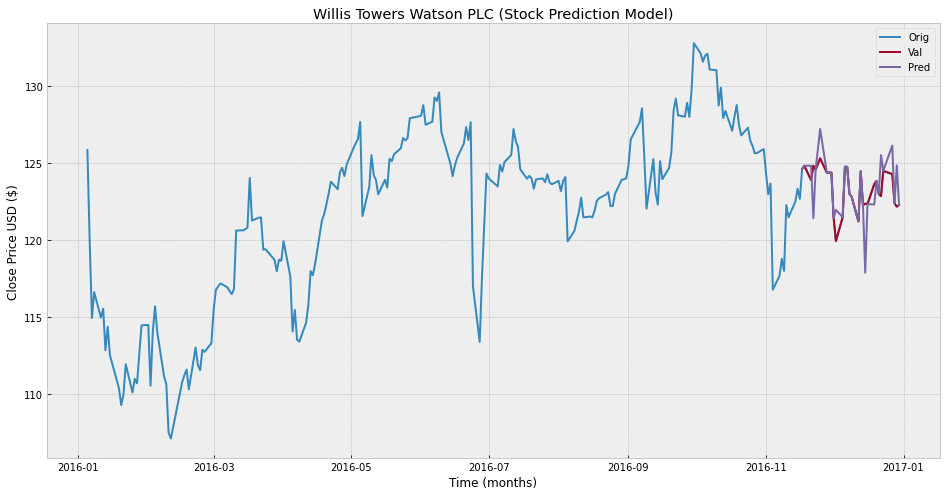

In [520]:
#Visualize the data
predictions = Tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Willis Towers Watson PLC (Stock Prediction Model)')
plt.xlabel('Time (months)')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


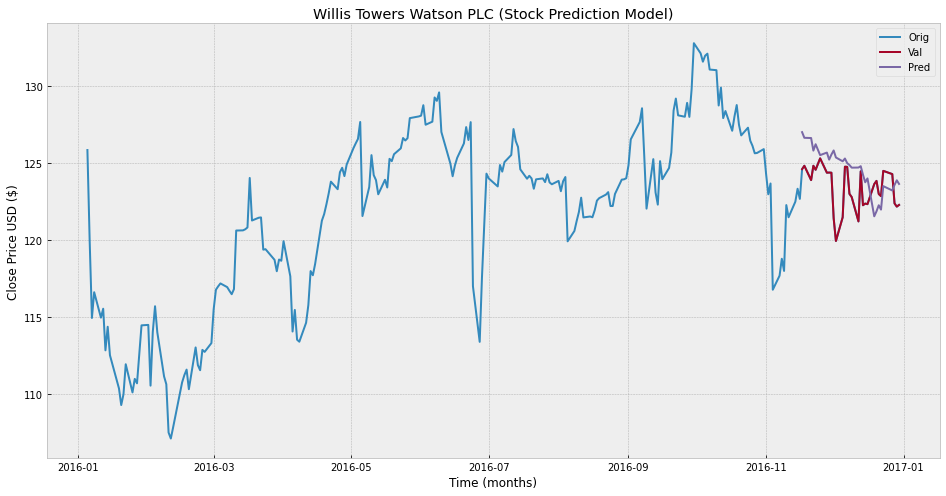

In [521]:
#Visualize the data
predictions = LR_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Willis Towers Watson PLC (Stock Prediction Model)')
plt.xlabel('Time (months)')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()